In [102]:
# !pip install scipy

In [103]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
import scipy
import community.community_louvain as cl


In [79]:
quran = pd.read_csv('The Quran Dataset.csv')

In [80]:
quran

,surah_no,surah_name_en,surah_name_ar,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_ar,ayah_en,ruko_no,juz_no,manzil_no,hizb_quarter,total_ayah_surah,total_ayah_quran,place_of_revelation,sajah_ayah,sajdah_no,no_of_word_ayah,list_of_words
0,1,The Opener,الفاتحة,Al-Fatihah,1,1,بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"In the Name of Allah—the Most Compassionate, M...",1,1,1,1,7,6236,Meccan,False,NaN,4,"[بِسْمِ,ٱللَّهِ,ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
1,1,The Opener,الفاتحة,Al-Fatihah,2,2,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ,"All praise is for Allah—Lord of all worlds,",1,1,1,1,7,6236,Meccan,False,NaN,4,"[ٱلْحَمْدُ,لِلَّهِ,رَبِّ,ٱلْعَٰلَمِينَ]"
2,1,The Opener,الفاتحة,Al-Fatihah,3,3,ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"the Most Compassionate, Most Merciful,",1,1,1,1,7,6236,Meccan,False,NaN,2,"[ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
3,1,The Opener,الفاتحة,Al-Fatihah,4,4,مَٰلِكِ يَوْمِ ٱلدِّينِ,Master of the Day of Judgment.,1,1,1,1,7,6236,Meccan,False,NaN,3,"[مَٰلِكِ,يَوْمِ,ٱلدِّينِ]"
4,1,The Opener,الفاتحة,Al-Fatihah,5,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,You ˹alone˺ we worship and You ˹alone˺ we ask ...,1,1,1,1,7,6236,Meccan,False,NaN,4,"[إِيَّاكَ,نَعْبُدُ,وَإِيَّاكَ,نَسْتَعِينُ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,114,The Mankind,الناس,An-Nas,2,6232,مَلِكِ ٱلنَّاسِ,"the Master of humankind,",556,30,7,240,6,6236,Meccan,False,NaN,2,"[مَلِكِ,ٱلنَّاسِ]"
6232,114,The Mankind,الناس,An-Nas,3,6233,إِلَٰهِ ٱلنَّاسِ,"the God of humankind,",556,30,7,240,6,6236,Meccan,False,NaN,2,"[إِلَٰهِ,ٱلنَّاسِ]"
6233,114,The Mankind,الناس,An-Nas,4,6234,مِن شَرِّ ٱلْوَسْوَاسِ ٱلْخَنَّاسِ,from the evil of the lurking whisperer—,556,30,7,240,6,6236,Meccan,False,NaN,4,"[مِن,شَرِّ,ٱلْوَسْوَاسِ,ٱلْخَنَّاسِ]"
6234,114,The Mankind,الناس,An-Nas,5,6235,ٱلَّذِى يُوَسْوِسُ فِى صُدُورِ ٱلنَّاسِ,who whispers into the hearts of humankind—,556,30,7,240,6,6236,Meccan,False,NaN,5,"[ٱلَّذِى,يُوَسْوِسُ,فِى,صُدُورِ,ٱلنَّاسِ]"


In [81]:
quran.describe()

,surah_no,ayah_no_surah,ayah_no_quran,ruko_no,juz_no,manzil_no,hizb_quarter,total_ayah_surah,total_ayah_quran,sajdah_no,no_of_word_ayah
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.0,15.000000,6236.000000
mean,33.519724,53.506575,3118.500000,313.199487,18.478833,4.528544,144.282232,106.013149,6236.0,8.000000,13.152341
std,26.461261,50.463924,1800.322471,155.390464,8.610080,2.057783,68.975408,69.497665,0.0,4.472136,10.319120
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6236.0,1.000000,1.000000
25%,11.000000,16.000000,1559.750000,190.000000,12.000000,3.000000,93.000000,52.000000,6236.0,4.500000,6.000000
50%,26.000000,38.000000,3118.500000,325.000000,19.000000,5.000000,150.000000,93.000000,6236.0,8.000000,11.000000
75%,51.000000,75.000000,4677.250000,455.000000,26.000000,7.000000,208.000000,135.000000,6236.0,11.500000,17.000000
max,114.000000,286.000000,6236.000000,556.000000,30.000000,7.000000,240.000000,286.000000,6236.0,15.000000,144.000000


In [82]:
quran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surah_no             6236 non-null   int64  
 1   surah_name_en        6236 non-null   object 
 2   surah_name_ar        6236 non-null   object 
 3   surah_name_roman     6236 non-null   object 
 4   ayah_no_surah        6236 non-null   int64  
 5   ayah_no_quran        6236 non-null   int64  
 6   ayah_ar              6236 non-null   object 
 7   ayah_en              6236 non-null   object 
 8   ruko_no              6236 non-null   int64  
 9   juz_no               6236 non-null   int64  
 10  manzil_no            6236 non-null   int64  
 11  hizb_quarter         6236 non-null   int64  
 12  total_ayah_surah     6236 non-null   int64  
 13  total_ayah_quran     6236 non-null   int64  
 14  place_of_revelation  6236 non-null   object 
 15  sajah_ayah           6236 non-null   b

### Columns descriptions
- surah_no:
This column represents the number of the surah (chapter) in the Quran.
Significance: Surahs are the chapters of the Quran, each of which contains verses (ayahs) and covers specific themes, events, or teachings.

- surah_name_en:
This column contains the name of the surah in English.
Significance: Provides the English name of the surah, which helps in identifying and referencing specific surahs.

- surah_name_ar:
This column contains the name of the surah in Arabic.
Significance: Provides the Arabic name of the surah, which is important for Islamic scholarship and reference.

- surah_name_roman:
This column contains the name of the surah in Roman script.
Significance: Provides an alternative representation of the surah name in a widely understandable script.

- ayah_no_surah:
This column represents the number of the ayah (verse) within the surah.
Significance: Helps in identifying and referencing specific verses within each surah.

- ayah_no_quran:
This column represents the overall number of the ayah in the Quran.
Significance: Provides a unique identifier for each ayah in the entire Quran.

- ayah_ar:
This column contains the text of the ayah in Arabic.
Significance: Contains the original Arabic text of each ayah, which is the primary source for Quranic study and recitation.

- ayah_en:
This column contains the English translation of the ayah.
Significance: Provides the meaning of each ayah in English, facilitating understanding for non-Arabic speakers.

- ruko_no:
This column represents the number of the ruko (section) within the surah.
Significance: Indicates the sections within each surah where recitation is recommended to pause briefly.

- juz_no:
This column represents the number of the juz (section) within the Quran.
Significance: The Quran is divided into 30 equal sections (juz) for recitation during the month of Ramadan. This column helps identify the section each ayah belongs to.

- manzil_no:
This column represents the manzil (division) within the Quran.
Significance: The Quran is divided into seven manazil for recitation in a week. This column helps identify the division each ayah belongs to.

- hizb_quarter:
This column represents the hizb (division) within the Quran.
Significance: The Quran is divided into 60 hizbs for easier recitation over a month. This column helps identify the division each ayah belongs to.

- total_ayah_surah:
This column represents the total number of ayahs in the surah.
Significance: Indicates the total number of verses in each surah, providing context for its length and structure.

- total_ayah_quran:
This column represents the total number of ayahs in the Quran.
Significance: Provides the total count of verses in the entire Quran, useful for understanding its overall size and structure.

- place_of_revelation:
This column contains information about the place of revelation of the surah.
Significance: Provides context regarding where specific surahs were revealed, aiding in understanding their historical and contextual significance.

- sajah_ayah:
This column indicates whether the ayah contains Sajdah (prostration).
Significance: Highlights verses in the Quran where prostration is recommended, emphasizing their spiritual significance.

- sajdah_no:
This column represents the number of the sajdah (prostration) if applicable.
Significance: Provides the number of the sajdah if a verse contains Sajdah, allowing for easy identification and reference.

- no_of_word_ayah:
This column represents the number of words in the ayah.
Significance: Provides quantitative information about the length of each ayah, which can be useful for linguistic analysis and comparison.

- list_of_words:
This column contains a list of words in the ayah.
Significance: Provides the words constituting each ayah, facilitating detailed textual analysis and study

In [83]:
# Check for missing values
missing_values = quran.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 surah_no                  0
surah_name_en             0
surah_name_ar             0
surah_name_roman          0
ayah_no_surah             0
ayah_no_quran             0
ayah_ar                   0
ayah_en                   0
ruko_no                   0
juz_no                    0
manzil_no                 0
hizb_quarter              0
total_ayah_surah          0
total_ayah_quran          0
place_of_revelation       0
sajah_ayah                0
sajdah_no              6221
no_of_word_ayah           0
list_of_words             0
dtype: int64


In [84]:
# Drop the 'sajdah_no' column from the dataset
quran = quran.drop(columns=['sajdah_no'])

## Exploring patterns 

In [85]:
# Example: Distribution of verses across surahs
verse_distribution = quran.groupby('surah_no').size()
print("Verse Distribution Across Surahs:\n", verse_distribution)

Verse Distribution Across Surahs:
 surah_no
1        7
2      286
3      200
4      176
5      120
      ... 
110      3
111      5
112      4
113      5
114      6
Length: 114, dtype: int64


## Investigating the Longest and Shortest Surahs

In [86]:
# Find the longest surah
longest_surah = verse_distribution.idxmax()
longest_surah_en_name = quran.loc[quran['surah_no'] == longest_surah, 'surah_name_en'].iloc[0]
longest_surah_ara_name = quran.loc[quran['surah_no'] == longest_surah, 'surah_name_ar'].iloc[0]
longest_surah_length = verse_distribution.max()

# Find the shortest surah
shortest_surah = verse_distribution.idxmin()
shortest_surah_en_name = quran.loc[quran['surah_no'] == shortest_surah, 'surah_name_en'].iloc[0]
shortest_surah_ara_name = quran.loc[quran['surah_no'] == shortest_surah, 'surah_name_ar'].iloc[0]
shortest_surah_length = verse_distribution.min()

print("Longest Surah:", longest_surah_en_name, longest_surah_ara_name)
print("Number of Verses:", longest_surah_length)
print("\nShortest Surah:", shortest_surah_en_name, shortest_surah_ara_name)
print("Number of Verses:", shortest_surah_length)

Longest Surah: The Cow البقرة
Number of Verses: 286

Shortest Surah: The Declining Day العصر
Number of Verses: 3


## Distribution of Verse Lengths within Each Surah:

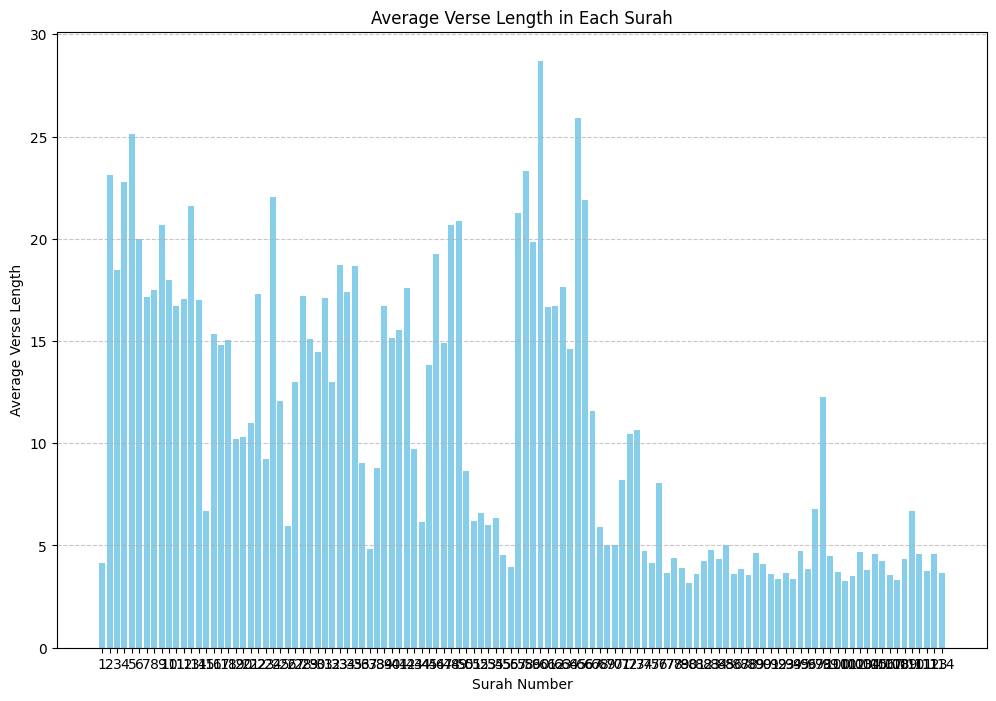

In [87]:
# Calculate the average verse length for each surah
average_verse_length = quran.groupby('surah_no')['no_of_word_ayah'].mean()

# Plotting the distribution of verse lengths within each surah
plt.figure(figsize=(12, 8))
plt.bar(average_verse_length.index, average_verse_length.values, color='skyblue')
plt.title('Average Verse Length in Each Surah')
plt.xlabel('Surah Number')
plt.ylabel('Average Verse Length')
plt.xticks(range(1, 115))  # Assuming there are 114 surahs in the Quran
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Word Cloud of Quranic Verses:
We can create a word cloud to visualize the most frequent words or phrases in the Quranic verses, providing insights into recurring themes or topics

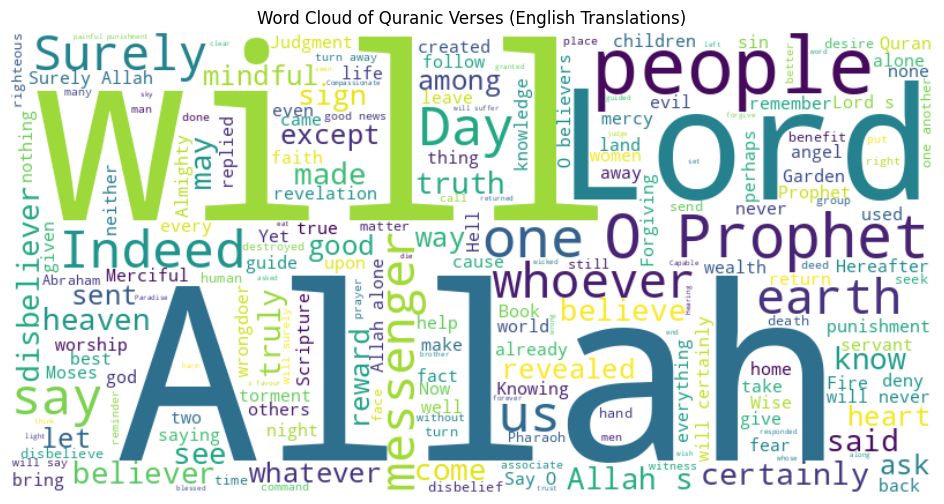

In [88]:

# Concatenate all English translations of Quranic verses into a single string
english_translations = ' '.join(quran['ayah_en'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(english_translations)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Quranic Verses (English Translations)')
plt.axis('off')
plt.show()

## Sentiment Analysis:
We can perform sentiment analysis on the English translations of Quranic verses to understand the overall sentiment or tone of the text.

In [89]:
# Download necessary resources for nltk
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each English translation of Quranic verses
sentiments = []
for verse in quran['ayah_en']:
    sentiment_score = sentiment_analyzer.polarity_scores(verse)
    # Classify the verse based on compound score
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

# Add the sentiment labels to the dataframe
quran['sentiment'] = sentiments

# Display the counts of each sentiment category
sentiment_counts = quran['sentiment'].value_counts()
print("Sentiment Analysis Results:")
print(sentiment_counts)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yamen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Results:
sentiment
Positive    2973
Negative    1974
Neutral     1289
Name: count, dtype: int64


## Network Analysis of Words:
We can analyze the relationships between words in the Quranic text using network analysis techniques, revealing patterns of word co-occurrence and semantic connections.

In [90]:
# Function to tokenize verses into words
def tokenize_verse(verse):
    return verse.split()

# Create a new networkx graph
G = nx.Graph()

# Tokenize each verse and add edges between co-occurring words
for verse in quran['ayah_en']:
    words = tokenize_verse(verse)
    for i, word in enumerate(words):
        for j in range(i + 1, len(words)):
            if G.has_edge(word, words[j]):
                # Increment edge weight if edge already exists
                G[word][words[j]]['weight'] += 1
            else:
                # Add new edge with weight 1
                G.add_edge(word, words[j], weight=1)

# Print some basic statistics about the network
print("Number of nodes (words):", G.number_of_nodes())
print("Number of edges (co-occurrences):", G.number_of_edges())

# Optional: Print the top 10 words with the highest degree centrality
degree_centrality = nx.degree_centrality(G)
top_words = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("\nTop 10 Words by Degree Centrality: (These words have the highest degree centrality, indicating that they are frequently co-occurring with other words in the Quranic verses)")
for word in top_words:
    print(word)

Number of nodes (words): 13027
Number of edges (co-occurrences): 769850

Top 10 Words by Degree Centrality: (These words have the highest degree centrality, indicating that they are frequently co-occurring with other words in the Quranic verses)
the
and
to
of
is
you
a
in
they
will


## Identifying communities of words within the network: 
Community detection algorithms can help identify groups of words that are densely connected within themselves but sparsely connected with the rest of the network.

We'll use the Louvain community detection algorithm, which is a popular method for detecting communities in networks.

In [96]:
# Apply the Louvain community detection algorithm
communities = cl.best_partition(G)

# Print the number of detected communities
num_communities = len(set(communities.values()))
print("Number of detected communities:", num_communities)

# Print the top words in each community
print("\nTop words in each community:")
for community_id in range(num_communities):
    words_in_community = [word for word, community_label in communities.items() if community_label == community_id]
    print(f"Community {community_id}: {', '.join(words_in_community[:5])}")

Number of detected communities: 8

Top words in each community:
Community 0: In, along, Path,, have, doubt
Community 1: the, Name, of, Allah—the, Most
Community 2: for, Guide, This, it, from
Community 3: worlds,, You, we, help., us
Community 4: that, blind,, so, may, severe
Community 5: worship, ask, with,, or, Book!
Community 6: Day, Judgment., those, blessed—not, are
Community 7: faith, by, slaughtered, killed, Allah;


These communities represent groups of words that are densely connected within themselves but less connected with words in other communities. Analyzing these communities can provide insights into the semantic relationships and thematic coherence within the Quranic text.

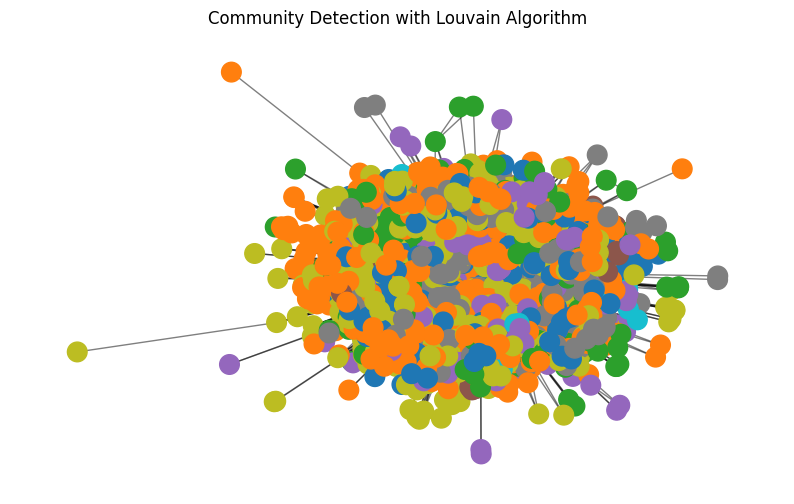

In [106]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using a spring layout

# Draw nodes with different colors for each community
nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.tab10, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Community Detection with Louvain Algorithm")
plt.axis('off')
plt.show()

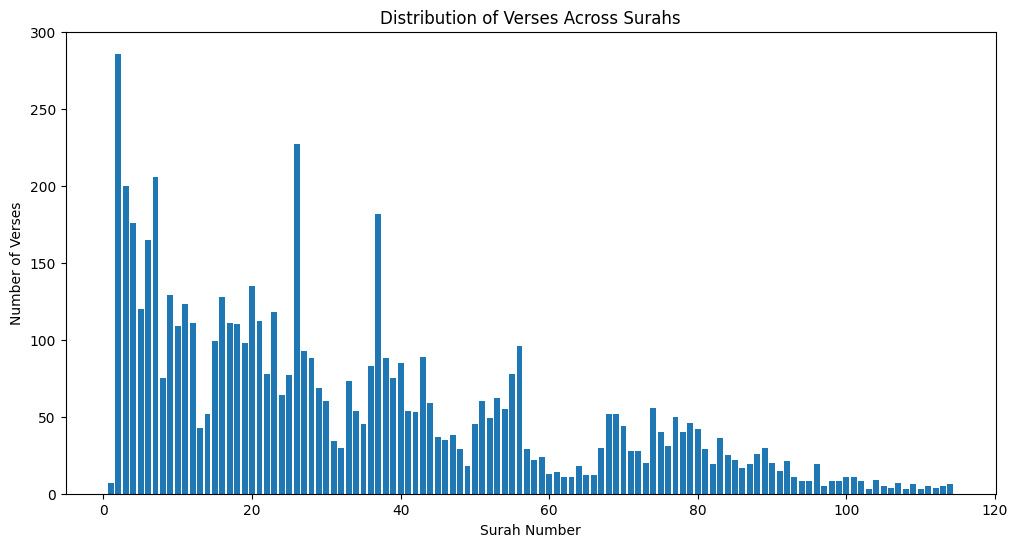

In [107]:
# Distribution of verses across surahs
plt.figure(figsize=(12, 6))
plt.bar(quran['surah_no'], quran['total_ayah_surah'])
plt.xlabel('Surah Number')
plt.ylabel('Number of Verses')
plt.title('Distribution of Verses Across Surahs')
plt.show()

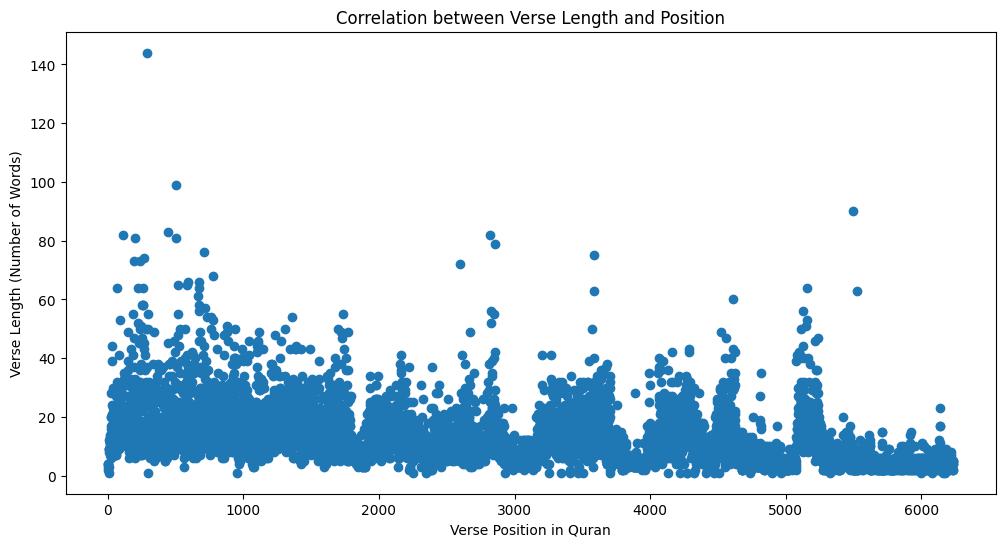

In [108]:
# Correlation between verse length and position
plt.figure(figsize=(12, 6))
plt.scatter(quran['ayah_no_quran'], quran['no_of_word_ayah'])
plt.xlabel('Verse Position in Quran')
plt.ylabel('Verse Length (Number of Words)')
plt.title('Correlation between Verse Length and Position')
plt.show()

In [111]:
# List of common names of prophets
prophet_names = ['adam', 'noah', 'hud', 'saleh', 'ibrahim', 'ismail', 'ishaq', 'yaqub', 'yusuf', 'shuayb',
                 'moses', 'harun', 'david', 'solomon', 'iliyas', 'al-yasa', 'jonah', 'ayyub', 'dhul-kifl',
                 'zakariya', 'yahya', 'isa', 'muhammad']

In [114]:
nltk.download('punkt')
# Function to search for prophet names in Quranic verses
def search_prophet_names(verse):
    tokens = nltk.word_tokenize(verse)
    prophet_words = [word.lower() for word in tokens if word.lower() in prophet_names]
    return prophet_words

# Search for prophet names in Quranic verses
quran['prophet_names'] = quran['ayah_en'].apply(search_prophet_names)

[nltk_data] Downloading package punkt to /home/yamen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [115]:
from collections import Counter

# Count occurrences of each prophet's name in the Quranic text
prophet_names_counts = Counter(quran['prophet_names'].explode())

# Find the prophet name mentioned the highest number of times
most_mentioned_prophet = prophet_names_counts.most_common(1)[0]

# Display the most mentioned prophet
print("Prophet Mentioned Most Frequently in the Quran:")
print(f"{most_mentioned_prophet[0].capitalize()}: {most_mentioned_prophet[1]} mentions")

Prophet Mentioned Most Frequently in the Quran:
Moses: 172 mentions


In [116]:
# Calculate average word length
quran['word_lengths'] = quran['ayah_en'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Calculate vocabulary richness
quran['unique_words'] = quran['ayah_en'].apply(lambda x: len(set(x.split())))

# Calculate average sentence length
quran['sentence_lengths'] = quran['ayah_en'].apply(lambda x: len(x.split()))

# Display the results
average_word_length = quran['word_lengths'].mean()
vocabulary_richness = quran['unique_words'].mean()
average_sentence_length = quran['sentence_lengths'].mean()

print("Language Complexity Analysis:")
print(f"Average Word Length: {average_word_length:.2f}")
print(f"Vocabulary Richness: {vocabulary_richness:.2f}")
print(f"Average Sentence Length: {average_sentence_length:.2f}")

Language Complexity Analysis:
Average Word Length: 4.63
Vocabulary Richness: 21.11
Average Sentence Length: 23.87


In [120]:
import folium

# Geographical coordinates for Mecca and Medina
mecca_coordinates = (21.4225, 39.8262)
medina_coordinates = (24.4709, 39.6122)

# Create a map centered at Mecca
mymap = folium.Map(location=mecca_coordinates, zoom_start=6)

# Add markers for Mecca and Medina
folium.Marker(location=mecca_coordinates, popup='Mecca').add_to(mymap)
folium.Marker(location=medina_coordinates, popup='Medina').add_to(mymap)

# Save the map to an HTML file
mymap.save("mecca_medina_map.html")

# Display the map
mymap

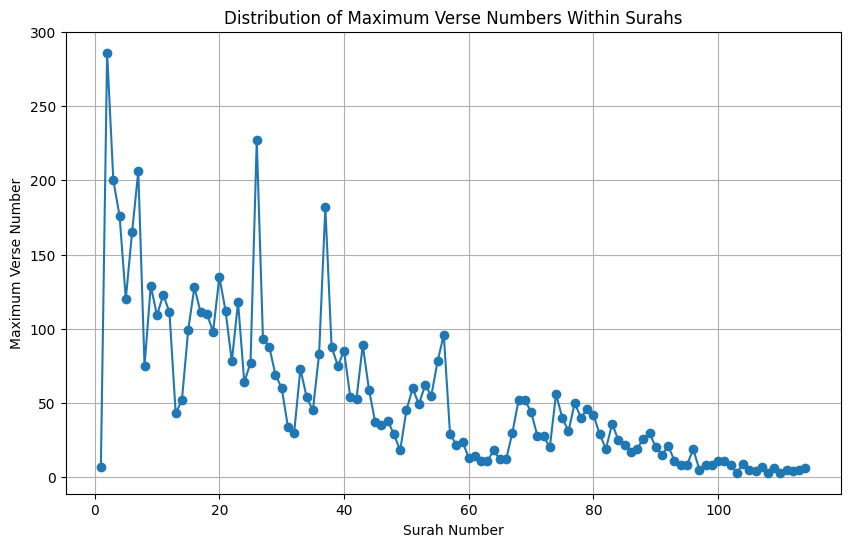

In [121]:
# Group verses by surah and calculate the maximum verse number in each surah
max_verse_by_surah = quran.groupby('surah_no')['ayah_no_surah'].max()

# Plot the distribution of maximum verse numbers within surahs
plt.figure(figsize=(10, 6))
plt.plot(max_verse_by_surah.index, max_verse_by_surah.values, marker='o', linestyle='-')
plt.title('Distribution of Maximum Verse Numbers Within Surahs')
plt.xlabel('Surah Number')
plt.ylabel('Maximum Verse Number')
plt.grid(True)
plt.show()

## Machine Learning Model to detect the place of revelation of the verses of the Quran

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample dataset containing Quranic verses and their corresponding revelation places (replace with your actual dataset)
quran_verses = quran['ayah_en'].tolist()
revelation_places = quran['place_of_revelation'].tolist()

# Convert verses to lowercase
quran_verses = [verse.lower() for verse in quran_verses]

# Vectorize verses using word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(quran_verses)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, revelation_places, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict revelation places for test data
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8373397435897436


## test a sample

In [126]:
# Sample Quranic verse for prediction
#Surah Al Anam Verse 75 in Mecca
sample_verse = "We also showed Abraham the wonders of the heavens and the earth, so he would be sure in faith."

# Vectorize the sample verse using the same vectorizer used for training
sample_verse_vectorized = vectorizer.transform([sample_verse])

# Predict the revelation place for the sample verse
predicted_place = clf.predict(sample_verse_vectorized)

print("Predicted Place of Revelation:", predicted_place[0])

Predicted Place of Revelation: Meccan
